<a href="https://colab.research.google.com/github/darchon30704/primers-sars-cov-2/blob/main/covid_primer_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/steppenwolf0/primers-sars-cov-2

https://www.nature.com/articles/s41598-020-80363-5#Sec2

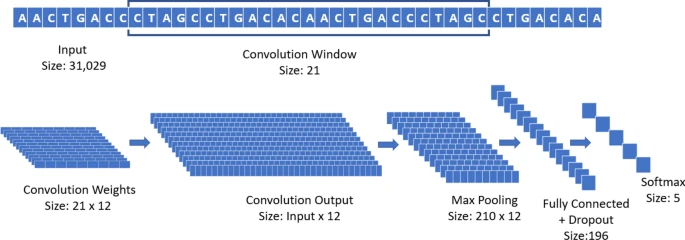

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Genomic/primers-sars-cov-2'

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import tarfile
import matplotlib.pyplot as plt

In [ ]:
# data_1503_featureSpace
data_0 = pd.read_csv(path+'/data_1503_featureSpace/data/data_0.csv')
features_0 = pd.read_csv(path+'/data_1503_featureSpace/data/features_0.csv')
labels_0 = pd.read_csv(path+'/data_1503_featureSpace/data/labels.csv')

sequences= pd.read_csv(path+'/CNN/data/sequences.csv')
labels= pd.read_csv(path+'/CNN/data/labels.csv')

In [ ]:
ss= pd.read_csv(path+'/CNN/data/sequences.csv', names=["seq"])

In [ ]:
ss


,seq
0,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
1,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...
2,GATTTAAGTGAATAGCTTGGCTATCTCACTTTCCCTCGTTCTCTTG...
3,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...
4,GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTG...
...,...
548,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
549,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
550,TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...
551,CAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTC...


In [ ]:
max(ss.seq.str.len())

31029

## crossValB.py

In [ ]:
def oneHot(array, size):
	output=[]
	# print('len(array): ',len(array))
	# print('size: ',size)
	# print('array: ',array)
	for i in range (len(array)):
		temp=np.zeros(size)
		temp[int(array[i])]=1
		output.append(temp)
	# print('output len:',len(output))
	# print('output len 0:',len(output[0]))
	return np.array(output)

In [ ]:
def get_Info(indexVar,dataFolder):
	#examples=8129

	data = pd.read_csv(dataFolder+'sequences.csv', header=None).values.ravel()
	print('data set', data.shape)

	
	labels=pd.read_csv(dataFolder+'labels.csv', header=None).values.ravel()
	
	labelSize=int(np.max(labels)+1)
	
	max=0
	for i in range (0,len(data)):
		if (len(data[i])>max):
			max=len(data[i])
	
	vectorSize=max
	print('vectorSize', vectorSize)
	
	#print(labels)
	testIndex=pd.read_csv(dataFolder+'index/'+str(indexVar)+'test_index.txt', header=None).values.ravel()
	valIndex=pd.read_csv(dataFolder+'index/'+str(indexVar)+'val_index.txt', header=None).values.ravel()
	trainIndex=pd.read_csv(dataFolder+'index/'+str(indexVar)+'train_index.txt', header=None).values.ravel()
	
	testIndex=testIndex.astype(int)
	valIndex=valIndex.astype(int)
	trainIndex=trainIndex.astype(int)
		
	train=[]
	test=[]
	valid=[]
	
	
	trainLabels=[]
	testLabels=[]
	validLabels=[]
	#test***************************************************************************
	for i in range (0,len(testIndex)):
		testLabels.append(labels[testIndex[i]])
		test.append(data[testIndex[i]])
	#valid***************************************************************************
	for i in range (0,len(valIndex)):
		validLabels.append(labels[valIndex[i]])
		valid.append(data[valIndex[i]])
	#train***************************************************************************
	for i in range (0,len(trainIndex)):
		trainLabels.append(labels[trainIndex[i]])
		train.append(data[trainIndex[i]])
	

	testLabels=np.array(testLabels)
	validLabels=np.array(validLabels)
	trainLabels=np.array(trainLabels)

	print('train length:',len(train))
	print('train length 0:',len(train[0]))
	print('train label shape:', trainLabels.shape)
	print('valid length:', len(valid))
	print('valid label shape:', validLabels.shape)
	print('test length:',len(test))
	print('test label shape:',testLabels.shape)
	
	print(labelSize)
	oneHot_train_labels=oneHot(trainLabels,labelSize)
	print('oneHot_train_labels.shape: ',oneHot_train_labels.shape)

	oneHot_valid_labels=oneHot(validLabels,labelSize)
	print('oneHot_valid_labels.shape:',oneHot_valid_labels.shape)

	oneHot_test_labels=oneHot(testLabels,labelSize)
	print('oneHot_test_labels.shape',oneHot_test_labels.shape)


	return(test,oneHot_test_labels,valid,oneHot_valid_labels,train,oneHot_train_labels,labelSize,vectorSize)

In [ ]:
kfoldIndex=0
dataFolder=path+'/CNN/data/'

(test_dataset_Flat,oneHot_test_labels,valid_dataset_Flat,oneHot_valid_labels,
	train_dataset_Flat,oneHot_train_labels,labelSize,vectorSize)=get_Info(
	kfoldIndex,dataFolder)
 

data set (553,)
vectorSize 31029
train length: 441
train length 0: 29727
train label shape: (441,)
valid length: 55
valid label shape: (55,)
test length: 57
test label shape: (57,)
5
oneHot_train_labels.shape:  (441, 5)
oneHot_valid_labels.shape: (55, 5)
oneHot_test_labels.shape (57, 5)


In [ ]:
vectorSize

31029

In [ ]:
def get_InfoTotal(dataFolder):
	#examples=8129

	dataSeq = pd.read_csv(dataFolder+'sequences.csv', header=None).values.ravel()
	data=dataSeq
	print('data set', data.shape)

	
	labels=pd.read_csv(dataFolder+'labels.csv', header=None).values.ravel()
	
	labelSize=int(np.max(labels)+1)
	
	max=0
	for i in range (0,len(data)):
		if (len(data[i])>max):
			max=len(data[i])
	
	vectorSize=max
	print('vectorSize', vectorSize)
	
	outData=[]
	outLabels=[]
	for i in range (len(data)):
		sample=np.zeros(vectorSize)
		for j in range (0, len(data[i])):
			if(data[i][j]=='C'):
				sample[j]=0.25
			elif(data[i][j]=='T'):
				sample[j]=0.50
			elif(data[i][j]=='G'):
				sample[j]=0.75
			elif(data[i][j]=='A'):
				sample[j]=1.0
			else:
				sample[j]=0.0
		outData.append(sample)
		outLabels.append(labels[i])
	
	data=np.array(outData)
	labels=np.array(outLabels)
	
	sort_index = np.argsort(labels)

	size=data.shape
	
	dataSorted=np.zeros((size[0],size[1]))
	labelsSorted=np.zeros(size[0])
	sequencesSorted=[]

	for i in range(0,len(labels)):
		labelsSorted[i]=labels[sort_index[i]]
		sequencesSorted.append(dataSeq[sort_index[i]])
		dataSorted[i]=data[sort_index[i]]
	
	pd.DataFrame(sequencesSorted).to_csv(path+'/CNN/data/filters/sequencesSorted.csv', header=None, index =None)
	#pd.DataFrame(dataSorted).to_csv("../data/filters/sortedData.csv", header=None, index =None)
	pd.DataFrame(labelsSorted).to_csv(path+'/CNN/data/filters/labelsSorted.csv', header=None, index =None)
	

	print(labelSize)
	oneHot_labels=oneHot(labelsSorted,labelSize)
	print(oneHot_labels.shape)

	return(dataSorted,oneHot_labels)

In [ ]:
(data,oneHotLabels)=get_InfoTotal(path+'/CNN/data/')

data set (553,)
vectorSize 31029
5
(553, 5)


In [ ]:
pd.DataFrame(oneHotLabels)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
548,0.0,0.0,0.0,0.0,1.0
549,0.0,0.0,0.0,0.0,1.0
550,0.0,0.0,0.0,0.0,1.0
551,0.0,0.0,0.0,0.0,1.0


In [ ]:
filter_0 = pd.read_csv(path+'/CNN/data/filters/filter_0.csv', header=None)
DNA_0 = pd.read_csv(path+'/CNN/data/filters/dataDNAFeatures_0.csv', header=None)
featsV_0 = pd.read_csv(path+'/CNN/data/filters/featsVector_0.csv', header=None)

In [ ]:
filter_0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30989,30990,30991,30992,30993,30994,30995,30996,30997,30998,30999,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,31010,31011,31012,31013,31014,31015,31016,31017,31018,31019,31020,31021,31022,31023,31024,31025,31026,31027,31028
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.051684,0.091732,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.118354,0.011225,0.179532,0.000000,0.000000,0.000000,0.000000,0.000000,0.041589,0.000341,0.04197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213936,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.194765,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.051684,0.091732,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.118354,0.011225,0.179532,0.000000,0.000000,0.000000,0.000000,0.000000,0.041589,0.000341,0.04197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213936,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.194765,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.000000,0.0,0.000000,0.000000,0.173915,0.052191,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.118354,0.011225,0.179532,0.000000,0.000000,0.000000,0.000000,0.000000,0.041589,0.000341,0.041970,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.213936,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.194765,0.296246,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.000000,0.0,0.000000,0.031243,0.070362,0.098038,0.000000,0.000000,0.000000,0.0,0.0,0.041589,0.000341,0.041970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213936,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.194765,0.296246,0.000000,0.000000,0.000000,0.064015,0.000000,0.000000,0.09311,0.097173,0.000000,0.054954,0.064544,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.027175,0.0,0.000000,0.000000,0.006380,0.000000,0.000000,0.102870,0.146194,0.0,0.0,0.000000,0.064015,0.000000,0.000000,0.093110,0.097173,0.000000,0.054954,0.064544,0.000000,0.000000,0.000000,0.027886,0.107019,0.00000,0.088125,0.000000,0.000000,0.000000,0.015039,0.128591,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0.000000,0.0,0.053295,0.030184,0.011094,0.000000,0.021279,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.155960,0.000000,0.000000,0.018398,0.090009,0.000000,0.000000,0.000000,0.000000,0.000000,0.179951,0.171052,0.00000,0.000000,0.098708,0.062487,0.000000,0.000000,0.000000,0.000000,0.000000,0.116604,0.00000,0.000000,0.018398,0.105128,0.000000,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
549,0.000000,0.0,0.000000,0.003754,0.040798,0.015384,0.036627,0.063079,0.000572,0.0,0.0,0.000000,0.027886,0.107019,0.000000,0.088125,0.000000,0.000000,0.000000,0.015039,0.128591,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
features_0

,0
0,ACCAACCAACTTTCGATCTCT
1,TTCTGCAGGCTGCTTACGGTT
2,AACGAGAAAACACACGTCCAA
3,ACTTGAACAGCCCTATGTGTT
4,AGTGGCTTACCGCAAGGTTCT
...,...
3883,ATCCGAAGGCTATCAAGTGTG
3884,AACTTGAACTTACCAGGCTGT
3885,AGGAACACAAATCCTATCCAG
3886,TACTACAATTTGCCTATTCTA


In [ ]:
featsV_0

,0
0,ACCAACCAACTTTCGATCTCT
1,TTCTGCAGGCTGCTTACGGTT
2,AACGAGAAAACACACGTCCAA
3,ACTTGAACAGCCCTATGTGTT
4,AGTGGCTTACCGCAAGGTTCT
...,...
3893,ATCCGAAGGCTATCAAGTGTG
3894,AACTTGAACTTACCAGGCTGT
3895,AGGAACACAAATCCTATCCAG
3896,TACTACAATTTGCCTATTCTA


# CNN 
## genCreateFilters.py

In [ ]:
#maximum number of iterations
iterMax=1000
limit=1.00
#regularization on the weights
beta=0.001
#version of the code
version='gen1'
#size of batch
batchSize=50
#Parameters*******************************************************************************
w1=12 # 12 filters
w4=196 # 196 rectified linear units
h1=148 # 148-position interval of the original genome
wd1=21 # 21-bps-long sequences. 
# There are 210 (31,029 divided by 148) max pooling features, 
# each one identifying the 21-bps sequence that obtained the highest value from the convolutional filter
index=0
kfoldIndex=0
generation=0

In [ ]:
import tensorflow as tf
#declare interactive session
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
sess=tf.InteractiveSession()
#INPUT->CONV LAYER->CONV LAYER->CONV LAYER->RECT FLAT->RECT DROPOUT

#function to declare easily the weights only by shape
def weight_variable(shape):
	initial = tf.truncated_normal(shape, stddev=0.1)
	return tf.Variable(initial)
#function to declare easily the bias only by shape
def bias_variable(shape):
	initial = tf.constant(0.1, shape=shape)
	return tf.Variable(initial)

#input variable
x = tf.placeholder(tf.float32, [None, vectorSize])
#keep probability to change from dropout 0.50 to 1.0 in validation and test
keep_prob = tf.placeholder(tf.float32)
#expected outputs variable
y_ = tf.placeholder(tf.float32, [None, labelSize])

#arrange the tensor as an image (1*31029) 1 channel
x_image0 = tf.reshape(x, [-1,1,vectorSize,1])
x_image = tf.transpose(x_image0, perm=[0,3,2,1])
#arrange the tensor into 1 channels (1*31029)

#1 LAYER*************************************************************************************
#1 Convolutional Layer Explicit for regularization of the weights
#weigth first layer 1 input channels, 12 output channels, 1x21 filter window size
W_conv1 = weight_variable([1, wd1, 1, w1])
#bias declaration the size has to be the same as the output channels 12
b_conv1 = bias_variable([w1])
#convolution (input weights) moving 1 step each time with a relu
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, 
	strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
#max pooling with a 148 width window size, moving 148 in width by step
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 1, h1, 1],
	strides=[1, 1, h1, 1], padding='SAME')
#output=545/4
#1 LAYER*************************************************************************************

#Rectifier LAYER*****************************************************************************
#calculated coefficient for the flattening from the size of the 3 convolutional layer
coef=int (h_pool1.get_shape()[1]*h_pool1.get_shape()[2]*h_pool1.get_shape()[3])
h_pool2_flat = tf.reshape(h_pool1, [-1, coef])
#declare the weights considering the constants and 256 output 
W_fc1 = weight_variable([coef, w4])
b_fc1 = bias_variable([w4])

#rectifier (matmul)
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#Rectifier LAYER*****************************************************************************

#Rectifier-Dropout LAYER**********************************************************************
#dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#declare weights with the ouput layer in this case 2 (labelSize)
W_fc2 = weight_variable([w4, labelSize])
b_fc2 = bias_variable([labelSize])
#output
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
#Rectifier-Dropout LAYER**********************************************************************

#Loss Function********************************************************************************
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[0]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_conv, labels=y_)+
	beta*tf.nn.l2_loss(W_conv1))
#Optimizer Adam at 1e-5 (literature)**********************************************************
train_step = tf.train.AdamOptimizer(1e-5).minimize(cross_entropy)
#softmax prediction remember we are using one hot labels
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

trueResult=tf.argmax(y_conv,1)
trueTest=tf.argmax(y_,1)
#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#Loss Function********************************************************************************
valid_accuracy_global=0.0
test_accuracy_global=0.0


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#start
sess.run(tf.initialize_all_variables())
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
saver.restore(sess, path+'/CNN/data/model/model.ckpt')
#Extra to verify sizes************************************************************************
print(x_image.get_shape())
#print(h_conv1.get_shape())
print(h_pool1.get_shape())

print(y_conv.get_shape())
print(y_.get_shape())
#Extra to verify sizes************************************************************************


Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/Colab Notebooks/Genomic/primers-sars-cov-2/CNN/data/model/model.ckpt
(?, 1, 31029, 1)
(?, 1, 210, 12)
(?, 5)
(?, 5)


In [ ]:
#Output:ay amo
units = sess.run(W_conv1,feed_dict={x:data, 
			y_: oneHotLabels, keep_prob: 1.0})
print(units.shape)
units = sess.run(h_conv1,feed_dict={x:data, 
			y_: oneHotLabels, keep_prob: 1.0})
print(units.shape)

dataSize=data.shape
sampleSize=int(dataSize[0])

In [ ]:
# Practice
#Output:ay amo
units_w = sess.run(W_conv1,feed_dict={x:data, 
			y_: oneHotLabels, keep_prob: 1.0})
print(units_w.shape)
units_h = sess.run(h_conv1,feed_dict={x:data, 
			y_: oneHotLabels, keep_prob: 1.0})
print(units_h.shape)

dataSize=data.shape
sampleSize=int(dataSize[0])

(1, 21, 1, 12)
(553, 1, 31029, 12)


In [ ]:
units_w[0][0][0]

array([ 0.00614528, -0.11750853,  0.1115165 ,  0.04802587, -0.12801747,
       -0.01048534, -0.11457278,  0.06753053,  0.09112253,  0.02589372,
       -0.01969883,  0.05848107], dtype=float32)

In [ ]:
units_h[0][0][0]

array([0.        , 0.25112575, 0.17467204, 0.        , 0.        ,
       0.11897328, 0.22199348, 0.22719112, 0.02040457, 0.2067591 ,
       0.        , 0.        ], dtype=float32)

In [ ]:
Mat=np.zeros((sampleSize, vectorSize))

for filterIndex in range(0,units.shape[3]):
	for testSize in range(0,sampleSize):
		for inputSize in range (0,vectorSize):
			Mat[testSize][inputSize]=units[testSize][0][inputSize][filterIndex]
	pd.DataFrame(Mat).to_csv(path+'/CNN/data/filters/filter_'+str(filterIndex)+".csv", header=None, index =None)

units = sess.run(h_pool1,feed_dict={x:data, 
			y_: oneHotLabels, keep_prob: 1.0})
print(units.shape)



Mat=np.zeros((sampleSize, units.shape[2]))

for filterIndex in range(0,units.shape[3]):
	for testSize in range(0,sampleSize):
		for inputSize in range (0,units.shape[2]):
			Mat[testSize][inputSize]=units[testSize][0][inputSize][filterIndex]
	pd.DataFrame(Mat).to_csv(path+'/CNN/data/filters/maxPool_'+str(filterIndex)+".csv", header=None, index =None)


(553, 1, 210, 12)


# CNN 
## funcCNN.py

In [ ]:
def openMatrix (name) :
	dataArray = np.genfromtxt(name, delimiter=' ')
	data=dataArray
	print(dataArray.shape)
	maxData=np.nanmax(dataArray)
	minData=np.nanmin(dataArray)
	meanData=np.nanmean(dataArray)
	distance=maxData-minData
	print('Max ',maxData)
	print('Min ',minData)
	print('meanData ',meanData)
	for i in range (len(dataArray)):
		for j in range (len(dataArray[0])):
			data[i][j]=(data[i][j]-minData)/distance
			#data[i][j]=data[i][j]
			if math.isnan(data[i][j]):
				data[i][j]=-1
	return data

def openVector (name) :
	dat= np.genfromtxt(name, delimiter=' ')
	#data = pd.read_csv(name, header=None)
	print(dat.shape)
	return dat

def saveMatrix(name,var):
	np.savetxt(name, var, fmt='%1.3f', delimiter=' ')

def saveMatrixInt(name,var):
	np.savetxt(name,var, fmt='%i', delimiter=' ')

def saveVectorInt(name,var):
	np.savetxt(name, var, fmt='%i', delimiter=' ')

#Pre Processing*********************************************************************
def oneHot (array, size):
	output=[]
	#print(len(array))
	#print(size)
	#print(array)
	for i in range (len(array)):
		temp=np.zeros(size)
		temp[int(array[i])]=1
		output.append(temp)
	print(len(output))
	print(len(output[0]))
	return np.array(output)

def compressArray(array,size):
	outputArray=[]
	for i in range(len(array)):
		temp=[]
		for j in range(size):
			if (j<len(array[0])):
				temp.append(array[i][j])
			else:
				temp.append(-1)
		outputArray.append(temp)
	return np.array(outputArray)

#def getBatch(data, labels, size):
#	index=[]
#	for i in range (len(data)):
#		index.append(i)
#	batch=random.sample(index,  size)
#	outData=[]
#	outLabels=[]
#	for i in range (len(batch)):
#		outData.append(data[batch[i]])
#		outLabels.append(labels[batch[i]])
#	return np.array(outData), np.array(outLabels)

def getBatch(data, labels, size, sampleSize):
	index=[]
	for i in range (len(data)):
		index.append(i)
	batch=random.sample(index,  size)
	outData=[]
	outLabels=[]
	for i in range (len(batch)):
		sample=np.zeros(sampleSize)
		for j in range (0, len(data[batch[i]])):
			if(data[batch[i]][j]=='C'):
				sample[j]=0.25
			elif(data[batch[i]][j]=='T'):
				sample[j]=0.50
			elif(data[batch[i]][j]=='G'):
				sample[j]=0.75
			elif(data[batch[i]][j]=='A'):
				sample[j]=1.0
			else:
				sample[j]=0.0
		outData.append(sample)
		outLabels.append(labels[batch[i]])
	return np.array(outData), np.array(outLabels)

def getBatch_c(data, labels, size, constants):
	index=[]
	for i in range (len(data)):
		index.append(i)
	batch=random.sample(index,  size)
	#print(batch)
	outData=[]
	outLabels=[]
	outConstants=[]
	for i in range (len(batch)):
		outData.append(data[batch[i]])
		outLabels.append(labels[batch[i]])
		outConstants.append(constants[batch[i]])
	return np.array(outData), np.array(outLabels), np.array(outConstants)

def getBatch_run_c(data, labels, size, constants,run,vector):
	infLimit=run*size
	supLimit=infLimit+size
	if supLimit > len(data):
		supLimit=len(data)
	batch=[]
	for i in range (infLimit,supLimit):
		batch.append(vector[i])
	outData=[]
	outLabels=[]
	outConstants=[]
	for i in range (len(batch)):
		outData.append(data[batch[i]])
		outLabels.append(labels[batch[i]])
		outConstants.append(constants[batch[i]])
	return np.array(outData), np.array(outLabels), np.array(outConstants)

	return np.array(outData), np.array(outLabels)

def print_no_newline(string):
	import sys
	sys.stdout.write(string)
	sys.stdout.flush()

#def getBatch_run(data, labels, size,run,vector):
#	infLimit=run*size
#	supLimit=infLimit+size
#	if supLimit > len(data):
#		supLimit=len(data)
#	batch=[]
#	for i in range (infLimit,supLimit):
#		batch.append(vector[i])
#	outData=[]
#	outLabels=[]
#	for i in range (len(batch)):
#		outData.append(data[batch[i]])
#		outLabels.append(labels[batch[i]])
#	return np.array(outData), np.array(outLabels)
 
def getBatch_run(data, labels, size,run,vector, sampleSize):
	infLimit=run*size
	supLimit=infLimit+size
	if supLimit > len(data):
		supLimit=len(data)
	batch=[]
	for i in range (infLimit,supLimit):
		batch.append(vector[i])
	outData=[]
	outLabels=[]
	for i in range (len(batch)):
		sample=np.zeros(sampleSize)
		for j in range (0, len(data[batch[i]])):
			if(data[batch[i]][j]=='C'):
				sample[j]=0.25
			elif(data[batch[i]][j]=='T'):
				sample[j]=0.50
			elif(data[batch[i]][j]=='G'):
				sample[j]=0.75
			elif(data[batch[i]][j]=='A'):
				sample[j]=1.0
			else:
				sample[j]=0.0
		outData.append(sample)
		outLabels.append(labels[batch[i]])
	return np.array(outData), np.array(outLabels)

## posPool.py

In [ ]:
import numpy as np
import math
import random
import pandas as pd 

for filterIndex in range(0,12):
	
	data = pd.read_csv(path+'/CNN/data/filters/'+"filter_"+str(filterIndex)+".csv", header=None).values
	numberWindows = 210

	sizeData=np.shape(data)

	print(sizeData)

	maxPool = np.zeros(shape=(sizeData[0],numberWindows))
	posPool = np.zeros(shape=(sizeData[0],numberWindows))

	for  i in range(0, sizeData[0]):
		maxPool_windowSize = 148
		pad_left_HPool = 25
		max = -1e6
		index = pad_left_HPool
		position = -1
		indexMax = 0
		for j in range (0, sizeData[1]):
			if data[i][j]>max:
				max=data[i][j]
				position=j
			index=index+1
			if (index == maxPool_windowSize) or (j == sizeData[1] - 1):
				maxPool[i][indexMax] = max
				posPool[i][indexMax] = position
				max = -1e6
				position = -1
				index = 0
				indexMax=indexMax+1
				
	pd.DataFrame(maxPool).to_csv(path+'/CNN/data/filters/'+"maxPool_"+str(filterIndex)+".csv", header=None, index =None)
	pd.DataFrame(posPool).to_csv(path+'/CNN/data/filters/'+"posPool_"+str(filterIndex)+".csv", header=None, index =None)

(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)
(553, 31029)


## createFeatVector.py

In [ ]:
import numpy as np
import math
import random
import pandas as pd 

filterIndex=0
posMatrix = pd.read_csv(path+'/CNN/data/filters/'+"posPool_"+str(filterIndex)+".csv", header=None).values
matrix = pd.read_csv(path+'/CNN/data/filters/'+"sequencesSorted.csv", header=None).values.ravel()

max=0
for i in range (0,len(matrix)):
	if (len(matrix[i])>max):
		max=len(matrix[i])

vectorSize=max
print('vectorSize', vectorSize)

outData=[]
for i in range (len(matrix)):
	sample=np.zeros(vectorSize)
	for j in range (0, len(matrix[i])):
		if(matrix[i][j]=='C'):
			sample[j]=0.25
		elif(matrix[i][j]=='T'):
			sample[j]=0.50
		elif(matrix[i][j]=='G'):
			sample[j]=0.75
		elif(matrix[i][j]=='A'):
			sample[j]=1.0
		else:
			sample[j]=0.0
	outData.append(sample)
	
matrix=np.array(outData)

sizePosMatrix=np.shape(posMatrix)
numberFilters = 21
padding = 10
dataDNA = [[0 for i in range(210 * numberFilters)] for j in range(sizePosMatrix[0])] 
#dataDNA = np.array(shape=(sizePosMatrix[0],210 * numberFilters))

sizeDNAMatrix=np.shape(matrix)
temp=((matrix[0]))
#temp=(str(matrix[0]))
print(temp)
for i in range (0,sizePosMatrix[0]):
	temp=((matrix[i]))
	for j in range ( 0, sizePosMatrix[1]):
		coef=int(posMatrix[i][j])
		for k in range(0, padding+1):
			if ((coef + k) < len(temp)):
				dataDNA[i][ j * numberFilters + padding + k] = temp[ coef + k]
			if ((coef - k) >= 0 and (coef - k)< len(temp)):
				dataDNA[i][ j * numberFilters + padding - k] = temp[ coef - k]


dataDNAString = [[0 for i in range(210 * numberFilters)] for j in range(sizePosMatrix[0])] 

for i in range (0,sizePosMatrix[0]):	
	for j in range ( 0, 210 * numberFilters):
		if (dataDNA[i][ j] == 0.25):
		
			dataDNAString[i][ j] = "C"
		
		elif (dataDNA[i][ j] == 0.50):
		
			dataDNAString[i][ j] = "T"
		
		elif (dataDNA[i][ j] == 0.75):
		
			dataDNAString[i][ j] = "G"
		
		elif (dataDNA[i][ j] == 1.00):
		
			dataDNAString[i][ j] = "A"
		
		else:
		
			dataDNAString[i][ j] = "N"
		
dataDNAFeatures = [[0 for i in range(210)] for j in range(sizePosMatrix[0])] 
for i in range (0,sizePosMatrix[0]):
	for j in range(0,210):
		dataDNAFeatures[i][ j] =str("")

for i in range (0,sizePosMatrix[0]):
	indexFeature = 0
	feature = 0
	for j in range(0,210 * numberFilters):
		dataDNAFeatures[i][ feature] =str(dataDNAFeatures[i][ feature])+str(dataDNAString[i][ j])
		indexFeature=indexFeature+1
		if (indexFeature == numberFilters):
			feature=feature+1
			indexFeature = 0

featsVector=[]            
for i in range (0,sizePosMatrix[0]):
	for j in range(0,210):
		count=featsVector.count(dataDNAFeatures[i][j])
		if (count==0):
			if ("N" not in dataDNAFeatures[i][j]):
				featsVector.append(dataDNAFeatures[i][j])


		
		
#pd.DataFrame(dataDNA).to_csv("dataDNA_"+str(filterIndex)+".csv", header=None, index =None)
#pd.DataFrame(dataDNAString).to_csv("dataDNAString_"+str(filterIndex)+".csv", header=None, index =None)
pd.DataFrame(featsVector).to_csv(path+'/CNN/data/filters/'+"featsVector_"+str(filterIndex)+".csv", header=None, index =None)
pd.DataFrame(dataDNAFeatures).to_csv(path+'/CNN/data/filters/'+"dataDNAFeatures_"+str(filterIndex)+".csv", header=None, index =None)

vectorSize 31029
[1.  0.5 0.5 ... 0.  0.  0. ]


## getFeatures.py

In [ ]:
filterIndex=0
vector = pd.read_csv(path+'/CNN/data/filters/'+"featsVector_"+str(filterIndex)+".csv", header=None).values.ravel()
sequences = pd.read_csv(path+'/CNN/data/'+"sequences.csv", header=None).values.ravel()

print(len(sequences))
print(len(vector))

sizeSeq=int(len(sequences))
sizeVec=int(len(vector))

freqMatrix = np.zeros((sizeSeq,sizeVec))

for i in range (0,sizeSeq):	
	for j in range ( 0, sizeVec):
		if (vector[j] in sequences[i]):
			freqMatrix[i][j]=sequences[i].count(vector[j])
		else:
			freqMatrix[i][j]=0

#pd.DataFrame(freqMatrix).to_csv("data_"+str(filterIndex)+".csv", header=None, index =None)

repeatedList=[]
for i in range (0,sizeSeq):	
	for j in range ( 0, sizeVec):
		if (freqMatrix[i][j]>1):
			if(vector[j] not in repeatedList):
				repeatedList.append(vector[j])

print(repeatedList)

nonRepeatedList=[]
for i in range ( 0, sizeVec):
	if (vector[i] not in repeatedList):
		nonRepeatedList.append(vector[i])

print("Repeated in the same sample: "+str(len(repeatedList)))
print("Non repeated in the same sample: "+str(len(nonRepeatedList)))


sizeSeq=int(len(sequences))
sizeVec=int(len(nonRepeatedList))

freqMatrix = np.zeros((sizeSeq,sizeVec))

for i in range (0,sizeSeq):	
	for j in range ( 0, sizeVec):
		if (nonRepeatedList[j] in sequences[i]):
			freqMatrix[i][j]=sequences[i].count(nonRepeatedList[j])
		else:
			freqMatrix[i][j]=0
			
pd.DataFrame(nonRepeatedList).to_csv(path+'/CNN/data/filters/'+"features_"+str(filterIndex)+".csv", header=None, index =None)
pd.DataFrame(freqMatrix).to_csv(path+'/CNN/data/filters/'+"data_"+str(filterIndex)+".csv", header=None, index =None)

553
3898
['GACGATGAAGATGTTGTTACT', 'TGTCAGATCTCATTAAATCTA', 'GTGTCTACTCTTCTCAACTAA', 'AATTATGTTCTTCAGGACTTT', 'AACAACATATCTAAAAATGTT', 'GGCCATGGTGCAGGAAGTGTG', 'ACTTAAAGATCGCACAGGCGC', 'ATTGAAATTTCGTCAAGTTTG', 'GTCTATATGCCTGCTAGTTGG', 'TTTTAATCAGCACGAAGTTCT']
Repeated in the same sample: 10
Non repeated in the same sample: 3888


## getFreqMatrix.py

In [ ]:
filterIndex=0
vector = pd.read_csv(path+'/CNN/data/filters/'+"features_"+str(filterIndex)+".csv", header=None).values.ravel()
sequences = pd.read_csv(path+'/CNN/data/'+"sequences.csv", header=None).values.ravel()

print(len(sequences))
print(len(vector))

sizeSeq=int(len(sequences))
sizeVec=int(len(vector))

freqMatrix = np.zeros((sizeSeq,sizeVec))

for i in range (0,sizeSeq):	
	for j in range ( 0, sizeVec):
		if (vector[j] in sequences[i]):
			freqMatrix[i][j]=sequences[i].count(vector[j])
		else:
			freqMatrix[i][j]=0

pd.DataFrame(freqMatrix).to_csv(path+'/CNN/data/filters/'+"data_"+str(filterIndex)+".csv", header=None, index =None)

553
3888


In [ ]:
import tensorflow.compat.v1 as tf
print(tf.__version__, tf.config.list_physical_devices('GPU'))

2.6.0 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## genRunTrain.py

In [ ]:
dataFolder=path+'/CNN/data/'

#Output:
f=open(dataFolder+'results/outputVector.txt', 'w')
f.write('1\n')
f.write('1\n')
temp=1.0
trueAcc=str(temp)
print(trueAcc)
f.write(trueAcc+'\n')
f.close()
#Parameters*******************************************************************************
#Maximum number of iterations
iterMax=100
## iterMax=int(sys.argv[1])

#maximum number of iterations
limit=1.01
#regularization on the weights
beta=0.001
#version of the code
version='gen1'
#size of batch
batchSize=50
#Parameters*******************************************************************************

w1=12 #12
## w1=int(sys.argv[2]) #12

w4=196
## w4=int(sys.argv[3]) #196

h1=148
## h1=int(sys.argv[4]) #148

wd1=21
##wd1=int(sys.argv[5]) #21

index=0
## index=int(sys.argv[6]) #0

kfoldIndex=0
## kfoldIndex=int(sys.argv[7]) #0

generation=0
## generation=int(sys.argv[8]) #0
#Input Data***********************************************************************************
(test_dataset_Flat,oneHot_test_labels,valid_dataset_Flat,oneHot_valid_labels,
	train_dataset_Flat,oneHot_train_labels,labelSize,vectorSize)=get_Info(
	kfoldIndex,dataFolder)
runs=int(len(oneHot_train_labels)/batchSize)
print(runs)
#Model declaration************************************************************************
#import tensorflow as tf
#declare interactive session
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
sess=tf.InteractiveSession()


#INPUT->CONV LAYER->CONV LAYER->CONV LAYER->RECT FLAT->RECT DROPOUT

#function to declare easily the weights only by shape
def weight_variable(shape):
	initial = tf.truncated_normal(shape, stddev=0.1)
	return tf.Variable(initial)
#function to declare easily the bias only by shape
def bias_variable(shape):
	initial = tf.constant(0.1, shape=shape)
	return tf.Variable(initial)

#input variable
x = tf.placeholder(tf.float32, [None, vectorSize])
#keep probability to change from dropout 0.50 to 1.0 in validation and test
keep_prob = tf.placeholder(tf.float32)
#expected outputs variable
y_ = tf.placeholder(tf.float32, [None, labelSize])

#arrange the tensor as an image (1*31029) 1 channel
x_image0 = tf.reshape(x, [-1,1,vectorSize,1])
x_image = tf.transpose(x_image0, perm=[0,3,2,1])
#arrange the tensor into 1 channels (1*31029)

#1 LAYER*************************************************************************************
#1 Convolutional Layer Explicit for regularization of the weights
#weigth first layer 1 input channels, 12 output channels, 1x21 filter window size
W_conv1 = weight_variable([1, wd1, 1, w1])
#bias declaration the size has to be the same as the output channels 12
b_conv1 = bias_variable([w1])
#convolution (input weights) moving 1 step each time with a relu
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, 
	strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
#max pooling with a 148 width window size, moving 148 in width by step
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 1, h1, 1],
	strides=[1, 1, h1, 1], padding='SAME')
#output=545/4
#1 LAYER*************************************************************************************

#Rectifier LAYER*****************************************************************************
#calculated coefficient for the flattening from the size of the 3 convolutional layer
coef=int (h_pool1.get_shape()[1]*h_pool1.get_shape()[2]*h_pool1.get_shape()[3])
h_pool2_flat = tf.reshape(h_pool1, [-1, coef])
#declare the weights considering the constants and 256 output 
W_fc1 = weight_variable([coef, w4])
b_fc1 = bias_variable([w4])

#rectifier (matmul)
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#Rectifier LAYER*****************************************************************************

#Rectifier-Dropout LAYER**********************************************************************
#dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#declare weights with the ouput layer in this case 2 (labelSize)
W_fc2 = weight_variable([w4, labelSize])
b_fc2 = bias_variable([labelSize])
#output
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
#Rectifier-Dropout LAYER**********************************************************************

#Loss Function********************************************************************************
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[0]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_conv, labels=y_)+
	beta*tf.nn.l2_loss(W_conv1))
#Optimizer Adam at 1e-5 (literature)**********************************************************
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#softmax prediction remember we are using one hot labels
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

trueResult=tf.argmax(y_conv,1)
trueTest=tf.argmax(y_,1)
#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#Loss Function********************************************************************************
valid_accuracy_global=0.0
test_accuracy_global=0.0


#start
sess.run(tf.initialize_all_variables())
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
#Extra to verify sizes************************************************************************
print(x_image.get_shape())
#print(h_conv1.get_shape())
print(h_pool1.get_shape())

print(y_conv.get_shape())
print(y_.get_shape())
#Extra to verify sizes************************************************************************

print('test ',str(oneHot_valid_labels.shape[0]))

xaV,yaV=getBatch(valid_dataset_Flat,oneHot_valid_labels,oneHot_valid_labels.shape[0],vectorSize)
print(xaV[1])
print(yaV[1])

yResult=[]
yTest=[]
#Ouput Data Variables*************************************************************************
name=str(str(kfoldIndex)+'_'+str(iterMax)+'_'+str(w1)+'_'+str(w4)+'_'+str(h1)+'_'+str(wd1))
f = open(dataFolder+'results/'+name+'.txt', 'a')
#Ouput Data Variables*************************************************************************

#Main Loop************************************************************************************
#initialize variables
iter=0
train_accuracy=0.0
valid_accuracy=0.0
test_accuracy=0.0
#best validation accuracy
best=0
validWindow=[0,0,0]
repeatWindow=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
validBest=1e6
#limit (normally a dummy value 0.80) and iterations...
while ((best<limit) & (iter<iterMax)):
	indexBatch=[]
	for iB in range (0,len(oneHot_train_labels)):
		indexBatch.append(iB)
	random.shuffle(indexBatch)
	for run in range (0,runs):
		#Get data from train set and store in xa (inputs),ya(labels),ca(constants) 100 batch size
		xa,ya=getBatch_run(train_dataset_Flat,oneHot_train_labels,batchSize,run,indexBatch,vectorSize)
		#pass the values and 0.50 dropout (literature)
		train_step.run(feed_dict={x: xa, y_: ya, keep_prob: 0.5})
		#print each 10 iterations
	#calculate train accuracy
	xa,ya=getBatch(train_dataset_Flat,oneHot_train_labels,batchSize,vectorSize)
	train_accuracy = accuracy.eval(feed_dict={
		x:xa, y_: ya, keep_prob: 1.0})
	#calculate validation accuracy
	xaV,yaV=getBatch(valid_dataset_Flat,oneHot_valid_labels,oneHot_valid_labels.shape[0],vectorSize)
	
	valid_accuracy=accuracy.eval(feed_dict={
		x: xaV, y_: yaV, keep_prob: 1.0})
	#calculate validation loss
	cross_entropyVal=cross_entropy.eval(feed_dict={
		x: xaV, y_: yaV, keep_prob: 1.0})
	#calculate train loss
	cross_entropyTrain=cross_entropy.eval(feed_dict={
		x: xa, y_: ya, keep_prob: 1.0})
	#append values for graphs
	#if valid accuracy is better than the best accuracy then calculate test accuracy
	#if valid_accuracy>best:
	validWindowValue=0
	tempValid=validWindow
	for i in range(0,len(validWindow)-1):
		tempValid[i]=validWindow[i+1]
	for i in range(0,len(validWindow)):
		validWindow[i]=tempValid[i]
	validWindow[len(validWindow)-1]=valid_accuracy
	for i in range(0,len(validWindow)):
		validWindowValue=validWindowValue+validWindow[i]
	validWindowValue=validWindowValue/len(validWindow)
	tempValid=repeatWindow
	for i in range(0,len(repeatWindow)-1):
		tempValid[i]=repeatWindow[i+1]
	for i in range(0,len(repeatWindow)):
		repeatWindow[i]=tempValid[i]
	repeatWindow[len(repeatWindow)-1]=valid_accuracy
	if np.var(repeatWindow)==0 and iter>10:
		iter=iter
	if (validWindowValue)>best or cross_entropyVal<validBest:
		validBest=cross_entropyVal
		best=(validWindowValue)
		
		xaT,yaT=getBatch(test_dataset_Flat,oneHot_test_labels,oneHot_test_labels.shape[0],vectorSize)
		#calculate test accuracy
		test_accuracy= accuracy.eval(feed_dict={x:xaT, 
			y_: yaT, keep_prob: 1.0})
		# Save the variables to disk.
		if (kfoldIndex==0):
			save_path = saver.save(sess, dataFolder+"model/model.ckpt")
		#plotNNFilter(units)
		#calculate the results of the whole model, probabilities in one hot format
		results=correct_prediction.eval(feed_dict={x:xaT, y_: yaT, keep_prob: 1.0})
		yResult=trueResult.eval(feed_dict={x:xaT, y_: yaT, keep_prob: 1.0})
		yTest=trueTest.eval(feed_dict={x:xaT, y_: yaT, keep_prob: 1.0})
		fOut=open(dataFolder+'results/outputVector.txt', 'w')
		fOut.write('1\n')
		fOut.write('1\n')
		temp=1.0-best
		trueAcc=str(temp)
		print(trueAcc)
		fOut.write(trueAcc+'\n')
		fOut.close()				
	#append everything to a log for retrieving results
	log="%d	%d	%g	%g	%g	%g	%g	%g"%(iter,kfoldIndex,train_accuracy,valid_accuracy,best, test_accuracy,cross_entropyVal,cross_entropyTrain)
	print(log)
	f.write(log+'\n')
	iter=iter+1
#Main Loop************************************************************************************

f.close()
saveVectorInt(dataFolder+'results/results'+name+'.txt',yResult)
saveVectorInt(dataFolder+'results/test'+name+'.txt',yTest)
f = open(dataFolder+'log3.txt', 'a')
name=str(str(index)+'_'+str(kfoldIndex)+'_'+str(iterMax)+'_'+str(test_accuracy)+'_'+str(valid_accuracy)+'_'+str(best)+'_'+str(w1)+'_'+
		 str(w4)+'_'+str(h1)+'_'+str(wd1)+'_'+str(generation))
f.write(name+'\n')
f.close()

#f=open(str(index)+'.index','a')
#name=str(str(index)+'_'+str(kfoldIndex)+'_'+str(iterMax)+'_'+str(test_accuracy)+'_'+str(valid_accuracy)+'_'+str(best)+'_'+str(w1)+'_'+#
#		 str(w4)+'_'+str(h1)+'_'+str(wd1)+'_'+str(generation))
#f.write(name+'\n')
#f.close()
#Input Data***********************************************************************************
#close session
f=open(dataFolder+'results/outputVector.txt', 'w')
f.write('1\n')
f.write('1\n')
temp=1.0-best
trueAcc=str(temp)
print(trueAcc)
f.write(trueAcc+'\n')
f.close()

xaT,yaT=getBatch(test_dataset_Flat,oneHot_test_labels,oneHot_test_labels.shape[0],vectorSize)

units = sess.run(h_conv1,feed_dict={x:xaT, 
			y_: yaT, keep_prob: 1.0})
print(units.shape)
units = sess.run(h_pool1,feed_dict={x:xaT, 
			y_: yaT, keep_prob: 1.0})
print(units.shape)

sess.close()

1.0
data set (553,)
vectorSize 31029
train length: 441
train length 0: 29727
train label shape: (441,)
valid length: 55
valid label shape: (55,)
test length: 57
test label shape: (57,)
5
441
5
oneHot_train_labels.shape:  (441, 5)
55
5
oneHot_valid_labels.shape: (55, 5)
57
5
oneHot_test_labels.shape (57, 5)
8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(?, 1, 31029, 1)
(?, 1, 210, 12)
(?, 5)
(?, 5)
test  55
[0.75 1.   0.75 ... 0.   0.   0.  ]
[0. 0. 1. 0. 0.]
0.8606060643990835
0	0	0.52	0.418182	0.139394	0.421053	1.3869	1.12948
0.721212128798167
1	0	0.4	0.418182	0.278788	0.421053	1.23546	1.21946
0.5575757622718811
2	0	0.56	0.490909	0.442424	0.561404	1.15226	1.09075
0.4727272689342499
3	0	0.76	0.672727	0.527273	0.701754	1.0855	0.951955
0.3757575750350952
4	0	0.76	0.709091	0.624242	0.719298	1.03052	0.954325
0.2909090916315714
5	0	0.76	0.745455	0.709091	0.719298	0.979467	0.897524
0.2666666706403097
6	0	0.74	0.745455	0.733333	0.719298	0.918081	0.881944
0.23636362950007117
7	0	0.8	0.8	0.763636	0.807018	0.87136	0.806802
0.21818180878957116
8	0	0.74	0.8	0.781818	0.807018	0.820673	0.917637
0.19999998807907104
9	0	0.88	0.8	0.8	0.807018	0.770379	0.61302
0.16363634665807092
10	0	0.9	0.909091	0.836364	0.807018	0.722896	0.699053
0.12727270523707068
11	0	0.96	0.909091	0.872727	0.859649	0.680634	0.563767
0.08484846353530884
12	0	0.96	0.927273	0.915